<a href="https://colab.research.google.com/github/heinercg/MLworkshop/blob/main/Clasificacion_de_Digitos_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificando digitos usando Logistic Regression

In [1]:
# Importar librerias
import matplotlib.pyplot as plt
import numpy as np


# Importar desde sklearn, dataset, metricas, logistic regression
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Conjunto de datos de dígitos
El conjunto de datos de dígitos consta de imágenes de dígitos de 8 x 8 píxeles. El atributo de imágenes del conjunto de datos almacena matrices de 8 x 8 valores en escala de grises para cada imagen. Usaremos estas matrices para visualizar las primeras 4 imágenes. El atributo de destino del conjunto de datos almacena el dígito que representa cada imagen y esto se incluye en el título de los 4 gráficos a continuación.

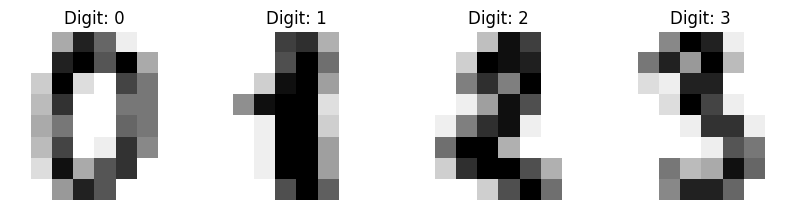

In [2]:
#Cargar los digitos desde el dataset
digits = datasets.load_digits()

#Mostrar los primeros digitos del dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Digit: %i" % label)

# Clasificación

Para aplicar un clasificador a estos datos, necesitamos aplanar las imágenes, convirtiendo cada matriz 2D de valores de escala de grises de forma (8, 8) a la forma de una fila (64,). Posteriormente, todo el conjunto de datos tendrá la forma (n_muestras, n_características), donde n_muestras es la cantidad de imágenes y n_características es la cantidad total de píxeles en cada imagen.

Luego, podemos dividir los datos en subconjuntos de prueba, validación y de entrenamiento y ajustar un clasificador de vectores de soporte a las muestras de entrenamiento. El clasificador ajustado se puede utilizar posteriormente para predecir el valor del dígito para las muestras en el subconjunto de prueba.

In [3]:
# Pasar las imagenes 2D a una sola fila
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Dividir los datos en 80% para entrenamiento/validation y 20% para pruebas
X_train_val, X_test, y_train_val, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False,
)

#Volver a dividir el 80% en entrenamiento 60% y 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, shuffle=False,
)

Crear el clasificador con un modelo de Logistic Regression

In [4]:

# Crear un clasificador: un clasificador de Logistic Regression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=100,
                         tol=1e-3,
                         random_state=42,
                        C=50)

# Aprender los dígitos en el subconjunto de entrenamiento
clf.fit(X_train, y_train)

# Predecir el valor del dígito en el subconjunto de validación
predicted_val = clf.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


A continuación visualizamos las primeras 4 muestras de prueba y mostramos su valor de dígito previsto en el título.

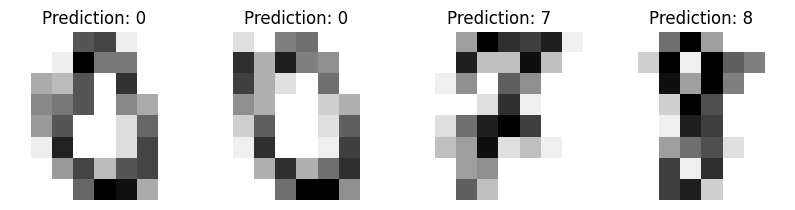

In [5]:
#Ver las predicciones
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_val, predicted_val):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_val, predicted_val)}\n"
)

Classification report for classifier LogisticRegression(C=50, random_state=42, solver='saga', tol=0.001):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.97      0.92      0.94        37
           2       0.97      0.97      0.97        36
           3       0.97      0.95      0.96        37
           4       1.00      0.89      0.94        37
           5       0.94      0.94      0.94        34
           6       0.90      1.00      0.95        37
           7       1.00      0.97      0.99        36
           8       0.92      0.94      0.93        35
           9       0.92      0.97      0.94        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




También podemos trazar una matriz de confusión de los valores de los dígitos verdaderos y los valores de los dígitos previstos.

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  2  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  1  0]
 [ 0  0  0  0 33  0  3  0  0  1]
 [ 0  0  1  0  0 32  1  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  1  0  0  0  1  0  0 33  0]
 [ 1  0  0  0  0  0  0  0  0 33]]


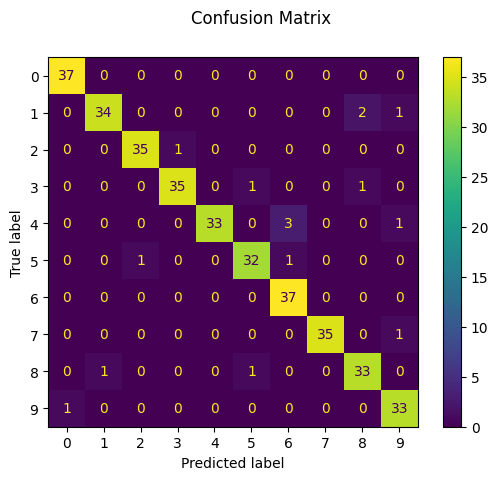

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_val, predicted_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Por último probamos el modelo subconjunto de testeo

In [8]:
# Predecir el valor del dígito en el subconjunto de validación
predicted_test = clf.predict(X_test)

# Imprimir las metricas
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted_test)}\n"
)

Classification report for classifier LogisticRegression(C=50, random_state=42, solver='saga', tol=0.001):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.91      0.81      0.85        36
           2       1.00      1.00      1.00        35
           3       0.90      0.70      0.79        37
           4       0.92      0.92      0.92        37
           5       0.84      1.00      0.91        37
           6       0.97      0.97      0.97        37
           7       0.91      0.89      0.90        36
           8       0.85      0.88      0.87        33
           9       0.75      0.89      0.81        37

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360




Confusion matrix:
[[33  0  0  0  1  0  1  0  0  0]
 [ 0 29  0  1  1  0  0  0  0  5]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  3  0  3  5  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  1  0  0  1  0  0 32  0  2]
 [ 0  1  0  0  0  2  0  0 29  1]
 [ 0  0  0  2  0  2  0  0  0 33]]


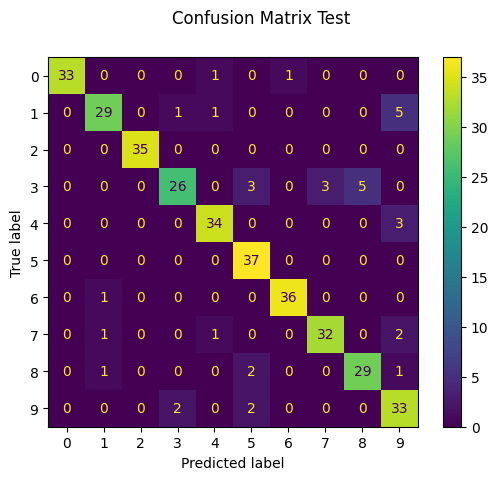

In [9]:
# Matriz de confusión para el testeo
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_test)
disp.figure_.suptitle("Confusion Matrix Test")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()